# Group 4 
## Cathrine, Sabine, Richard


* Load product from flexpart e.g. Birkenes (https://atmo-access.nilu.no/WEBPLOTS/NO0002R/2021/OUT_202101_0/ECMWF/sourcespectrum_TOTAL_BC_a_OUT_202101_0.dat)
* Load product from EBAS/Thredds
* Plot together

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import xarray as xr 
import netCDF4 as nc 
import threddsclient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [5]:
data = "https://atmo-access.nilu.no/WEBPLOTS/NO0002R/2021/OUT_202101_0/ECMWF/sourcespectrum_TOTAL_BC_a_OUT_202101_0.dat"
df=pd.read_fwf(data,widths=(6,15,15,7,8,9,7,7,8,7,7,8,7))#,skiprows=43+(i*59),nrows=57)

In [6]:
df

,UNIT S,TART END LON LA,T DOM ENE FLR I,ND SHP,WST TRA,BB,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ng/m3,20210101000000,20210101030000,8.252,58.3885,110.7632,0.8681,0.7069,13.1600,0.8177,2.8440,35.2325,0.0418
1,ng/m3,20210101030000,20210101060000,8.252,58.3885,116.9175,0.9714,0.6289,13.0945,0.9682,2.7820,37.4699,0.0336
2,ng/m3,20210101060000,20210101090000,8.252,58.3885,109.0426,1.0296,0.5008,13.8350,0.8958,2.7309,36.4756,0.0310
3,ng/m3,20210101090000,20210101120000,8.252,58.3885,107.2576,1.3855,0.5680,14.4666,0.8053,3.0454,36.7321,0.0213
4,ng/m3,20210101120000,20210101150000,8.252,58.3885,127.3615,2.0422,0.9947,13.8205,1.3331,3.0338,40.7295,0.0332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,ng/m3,20210131090000,20210131120000,8.252,58.3885,35.4047 1,.4118 5,.4604 4,.3850 1.,2726 1.,0779 12,.9365 0.,639.0000
244,ng/m3,20210131120000,20210131150000,8.252,58.3885,27.3197 1,.1362 6,.2758 3,.2431 1.,0080 0.,7578 9.,8969 0.0,592.0000
245,ng/m3,20210131150000,20210131180000,8.252,58.3885,29.7154 0,.9396 4,.9024 2,.3120 1.,1947 0.,4720 9.,5547 0.0,676.0000
246,ng/m3,20210131180000,20210131210000,8.252,58.3885,37.9714 0,.6752 4,.2180 2,.4523 1.,4163 0.,4176 12,.8387 0.,755.0000


In [7]:
ds_xr = xr.open_dataset('https://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20170101000000.20230627082633.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.6y.1h.NO01L_Radiance-Research_PSAP-3W_BIR_dry.NO01L_abs_coef_PSAP_v1.lev2.nc')
ds_xr

<xarray.Dataset>
Dimensions:                                               (time: 52560,
                                                           tbnds: 2,
                                                           metadata_time: 6,
                                                           Wavelength: 3,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 3,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 3,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 3)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables:
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    aerosol_absorption_coefficient_amean_qc               (Wavelength, aerosol_absorption_coefficient_amean_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_amean_ebasmetadata     (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_prec1587_qc            (Wavelength, aerosol_absorption_coefficient_prec1587_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_perc8413_qc            (Wavelength, aerosol_absorption_coefficient_perc8413_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/115)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      NO0002R, EMEP, aerosol_abs...
    id:                                            NO0002R.20170101000000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

In [8]:
# Calculate the closest wavelength to 637.0 nm. This is the wavelength used to calculate eBC.
given_wavelength = 637. 
all_wavelengths = ds_xr.Wavelength.values
key = lambda x:abs(x-given_wavelength)

closest_wavelength = min(all_wavelengths, key=lambda x:abs(x-given_wavelength))
closest_wavelength

660.0

In [9]:
# Find the indices of the two wavelengths closest to 637.0 nm
w1_index = np.where(all_wavelengths==closest_wavelength)[0][0]
if closest_wavelength > given_wavelength: 
    w2_index = w1_index-1
    print(all_wavelengths[w2_index], all_wavelengths[w1_index])
else: 
    w2_index = w1_index+1
    print(all_wavelengths[w1_index], all_wavelengths[w2_index])

522.0 660.0


In [10]:
# Create datasets with the aerosol absorption coefficient of each wavelength
ab = ds_xr["aerosol_absorption_coefficient_amean"] 
ab_w1 = ab.sel(Wavelength = all_wavelengths[w1_index]) 
ab_w2 = ab.sel(Wavelength = all_wavelengths[w2_index])
ab_w1

<xarray.DataArray 'aerosol_absorption_coefficient_amean' (time: 52560)>
[52560 values with dtype=float64]
Coordinates:
  * time        (time) datetime64[ns] 2017-01-01T00:30:00 ... 2022-12-31T23:3...
    Wavelength  float64 660.0
Attributes: (12/60)
    units:                                         1/Mm
    ancillary_variables:                           aerosol_absorption_coeffic...
    cell_methods:                                  time: mean
    ebas_data_license:                             https://creativecommons.or...
    ebas_revision_date:                            20230627082633
    ebas_version:                                  1
    ...                                            ...
    ebas_framework_description:                    ACTRIS is the European Res...
    ebas_framework_contact_name:                   Cathrine Lund Myhre, Kjeti...
    ebas_framework_contact_email:                  clm@nilu.no, kt@nilu.no, M...
    ebas_originator:                               Fiebig, Markus, Markus.Fie...
    ebas_submitter:                                Lunder, Chris, crl@nilu.no...
    ebas_acknowledgement:                          Request acknowledgement de...

In [11]:
# Function for calculating the Ångström exponent 
# sigma1 is the aerosol absorption coefficients for wavelength lambda1
# sigma2 is the aerosol absorption coefficients for wavelength lambda2

def angstrom(sigma1,sigma2,lambda1, lambda2):
    # For a smooth operation, check that datasets are even in size.
    if len(sigma1) == len(sigma2):
        A = len(sigma1)
    else:
        return print("Match length of datasets.")
    
    alpha = np.zeros(A) # empty array with length of dataset
    
    for i in range(A):
        # checking for NaNs and negative numbers
        if np.isnan(sigma1[i]) or np.isnan(sigma2[i]):
            alpha[i] = np.nan
        if sigma1[i] < 0 or sigma2[i] < 0:
            alpha[i] = np.nan
        else:
            alpha[i] = (np.log(sigma2[i]/sigma1[i]))/(np.log(lambda1/lambda2))
        time = sigma1.index
    return time, alpha

In [12]:
#Create dataframes for plotting
ab_w1_df = ab_w1.to_dataframe()
ab_w2_df = ab_w2.to_dataframe()
lambda_w1 = all_wavelengths[w1_index]
lambda_w2 = all_wavelengths[w2_index]

time, alpha = angstrom(ab_w1_df["aerosol_absorption_coefficient_amean"], ab_w2_df["aerosol_absorption_coefficient_amean"],lambda_w1, lambda_w2)

In [13]:
# Function for the extrapolated values of aerosol absorption coefficient at wavelength 637.0 nm

# a: angstrom exponent
# sigma: known coefficient, either absorption or scattering. depending on what you calculated the exponent for
# lambda_a: wavelength you want to find the coefficient for
# lambda1: wavelength for sigma

def make_coeff(a, sigma, lambda_a, lambda1):
    coeff = np.zeros(len(a))
    for i in range(len(a)):
        coeff[i] = ((lambda_a/lambda1)**(-a[i]))*sigma[i]
    time = sigma.index
    return time, coeff

# Executing the function for deriving absoprtion coefficient at wanted wavelength

time, abs_coeff637 = make_coeff(alpha, ab_w1_df["aerosol_absorption_coefficient_amean"], given_wavelength, lambda_w1)

df_ab637 = pd.DataFrame(abs_coeff637, time) # making into dataframe
df_ab637.columns = ["estimated_aerosol_absorption_coefficient"]

df_ab637

,estimated_aerosol_absorption_coefficient
time,
2017-01-01 00:30:00,0.140854
2017-01-01 01:30:00,0.107915
2017-01-01 02:30:00,0.081934
2017-01-01 03:30:00,0.048209
2017-01-01 04:30:00,0.025420
...,...
2022-12-31 19:30:00,0.706526
2022-12-31 20:30:00,0.552238
2022-12-31 21:30:00,0.464595


In [14]:
# Plot of extrapolated aerosol absorption coefficient at 637.0 nm 
# compared to aerosol absorption coefficient at closest wavelength

# This is a check that the extrapolation is correct


ab_w1_df["aerosol_absorption_coefficient_amean"].plot(ax=ax, label="Estimated absorption coefficient, {} nm".format(lambda_w1))
#ab_w2_df["aerosol_absorption_coefficient_amean"].plot(ax=ax, label="Estimated absorption coefficient, {}nm".format(lambda_w2))
df_ab637["estimated_aerosol_absorption_coefficient"].plot(ax=ax, label="Estimated absorption coefficient, 637 nm")

NameError: name 'ax' is not defined

In [15]:
# Convert from dataframe to Data Array with correct wavelength
da_ab637 = df_ab637.to_xarray().assign_coords({"Wavelength": (637.0)})
da_ab637

<xarray.Dataset>
Dimensions:                                   (time: 52560)
Coordinates:
  * time                                      (time) datetime64[ns] 2017-01-0...
    Wavelength                                float64 637.0
Data variables:
    estimated_aerosol_absorption_coefficient  (time) float64 0.1409 ... 0.3574

In [16]:
# Calculate equivalent black carbon from aerosol absorption coefficient. 
MAC = 10.0 #m2 g-1

da_eBC = (da_ab637.estimated_aerosol_absorption_coefficient/MAC).rename('eBC')

da_eBC

<xarray.DataArray 'eBC' (time: 52560)>
array([0.01408544, 0.01079152, 0.0081934 , ..., 0.0464595 , 0.04567548,
       0.03574394])
Coordinates:
  * time        (time) datetime64[ns] 2017-01-01T00:30:00 ... 2022-12-31T23:3...
    Wavelength  float64 637.0

<Axes: xlabel='time'>

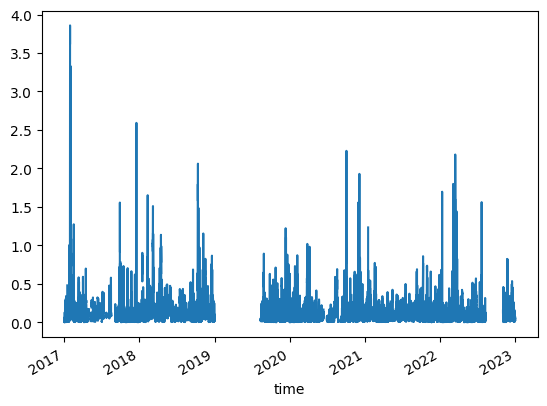

In [17]:
# Convert xarray's DataArray to pandas DataFrame and plot data.
df_eBC = da_eBC.to_dataframe()
df_eBC.eBC.plot()

In [18]:
data = "https://atmo-access.nilu.no/WEBPLOTS/NO0002R/2021/OUT_202101_0/ECMWF/sourcespectrum_TOTAL_BC_a_OUT_202101_0.dat"
tray=pd.read_fwf(data,widths=(6,15,15,7,8,9,7,7,8,7,7,8,7))#,skiprows=43+(i*59),nrows=57)

In [19]:
tray.columns=['unit','start','end','lon','lat','DOM', 'ENE', 'FLR', 'IND', 'SHP', 'WST', 'TRA', 'BB']

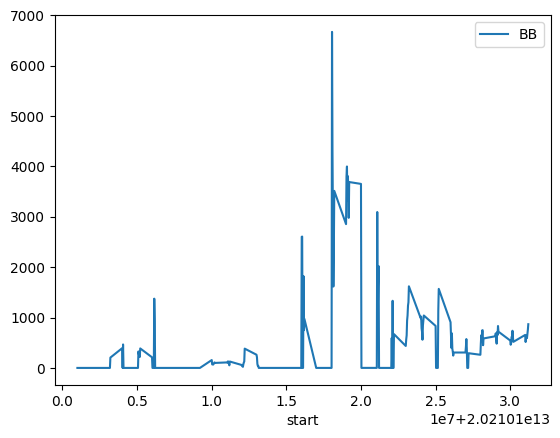

In [22]:
tray.plot(x='start',y=['DOM','ENE','FLR','IND','SHP','WST','TRA','BB'])
plt.show()

In [21]:
#df=pd.read_csv(data,sep=' ')
df=tray
df['total_bc']=df[['DOM', 'ENE', 'FLR', 'IND', 'SHP', 'WST', 'TRA', 'BB']].sum(axis=1)


df.plot(x='START',y='total_bc')
df.show()

TypeError: can only concatenate str (not "float") to str